In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END # start and end point
from IPython.display import Image, display

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    final: int

In [4]:
def add_node(state: AgentState) -> AgentState:
    state["final"] = state["number1"] + state["number2"]
    return state
def subtract_node(state: AgentState) -> AgentState:
    state["final"] = state["number1"] - state["number2"]
    return state

def decide(state: AgentState): 
    # This is a function, not a node
    if state["operation"] == "+":
        return "add_operation"
    elif state["operation"] == "-":
        return "sub_operation"

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("router", lambda state: state) # state will not change

graph.add_edge(START, "router")
graph.add_conditional_edges( # from "router", using a function, to certain node based on what the function returns
    "router",
    decide,
    {
        "add_operation": "add_node", # edge, node
        "sub_operation": "subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()

app.invoke(
    {
        "number1": 5,
        "number2": 2,
        "operation": "+",
    }
)

{'number1': 5, 'number2': 2, 'operation': '+', 'final': 7}

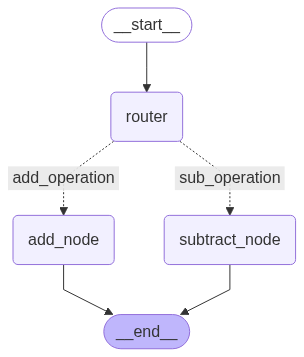

In [6]:
display(Image(app.get_graph().draw_mermaid_png()))